In [2]:
from mmdet.core.anchor import AnchorGenerator

In [29]:
ag = AnchorGenerator(
    strides=[
        8,
    ],
    ratios=[
        2,
    ],
    scales=[
        1,
    ],
)


featmap_size = (4, 4)  # toy example feature map size

# Generate anchors
anchors = ag.grid_priors([featmap_size], device="cpu")

# Print the generated anchors
print(anchors[0].shape)  # Expected: (8x8x3, 4)
print(anchors[0])

torch.Size([16, 4])
tensor([[-2.8284, -5.6569,  2.8284,  5.6569],
        [ 5.1716, -5.6569, 10.8284,  5.6569],
        [13.1716, -5.6569, 18.8284,  5.6569],
        [21.1716, -5.6569, 26.8284,  5.6569],
        [-2.8284,  2.3431,  2.8284, 13.6569],
        [ 5.1716,  2.3431, 10.8284, 13.6569],
        [13.1716,  2.3431, 18.8284, 13.6569],
        [21.1716,  2.3431, 26.8284, 13.6569],
        [-2.8284, 10.3431,  2.8284, 21.6569],
        [ 5.1716, 10.3431, 10.8284, 21.6569],
        [13.1716, 10.3431, 18.8284, 21.6569],
        [21.1716, 10.3431, 26.8284, 21.6569],
        [-2.8284, 18.3431,  2.8284, 29.6569],
        [ 5.1716, 18.3431, 10.8284, 29.6569],
        [13.1716, 18.3431, 18.8284, 29.6569],
        [21.1716, 18.3431, 26.8284, 29.6569]])


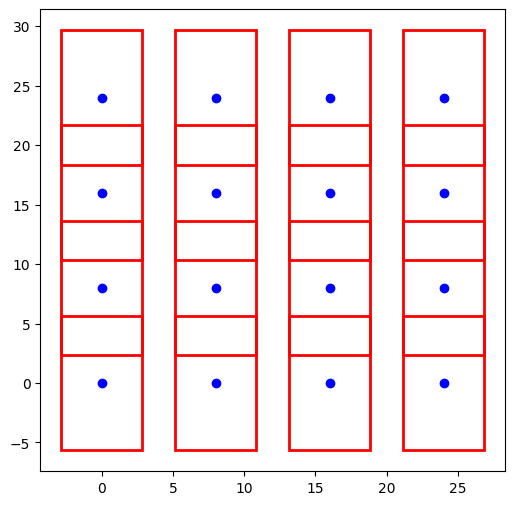

In [30]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(6, 6))

# Plot each anchor box
for x_min, y_min, x_max, y_max in anchors[0]:
    width = x_max - x_min
    height = y_max - y_min
    rect = patches.Rectangle(
        (x_min, y_min), width, height, linewidth=2, edgecolor="r", facecolor="none"
    )
    ax.add_patch(rect)

    # Mark the center
    center_x = (x_min + x_max) / 2
    center_y = (y_min + y_max) / 2
    ax.plot(center_x, center_y, "bo")